In [116]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [118]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [119]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [120]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 100)               4200      
                                                                 
 dense_125 (Dense)           (None, 50)                5050      
                                                                 
 dense_126 (Dense)           (None, 10)                510       
                                                                 
 dense_127 (Dense)           (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [121]:
type(model.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 100)               4200      
                                                                 
 dense_125 (Dense)           (None, 50)                5050      
                                                                 
 dense_126 (Dense)           (None, 10)                510       
                                                                 
 dense_127 (Dense)           (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


NoneType

In [122]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [123]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.4281 - accuracy: 0.7924 - val_loss: 0.3809 - val_accuracy: 0.8164
Epoch 2/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3775 - accuracy: 0.8110 - val_loss: 0.3751 - val_accuracy: 0.8086
Epoch 3/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3746 - accuracy: 0.8119 - val_loss: 0.3714 - val_accuracy: 0.8139
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3712 - accuracy: 0.8126 - val_loss: 0.3690 - val_accuracy: 0.8173
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3719 - accuracy: 0.8121 - val_loss: 0.3657 - val_accuracy: 0.8151
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3703 - accuracy: 0.8149 - val_loss: 0.3649 - val_accuracy: 0.8148
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3675 - accuracy: 0.8166 - val_loss: 0.3833 - val_accuracy: 0.8007

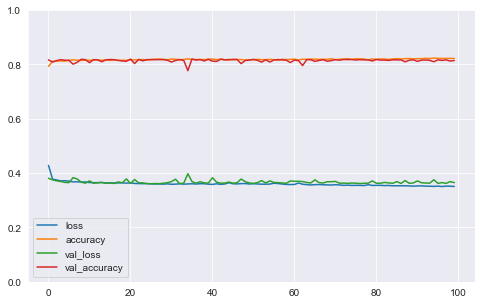

In [124]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [125]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3647 - accuracy: 0.8142


[0.36467817425727844, 0.8142098188400269]

In [126]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [127]:
from sklearn.preprocessing import StandardScaler
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
# results = {}
# accuracy = {}

In [128]:
import warnings
from sklearn import  metrics
results = []


sigmoid
Epoch 1/50
943/943 [==============================] - 3s 2ms/step - loss: 0.5415 - accuracy: 0.7536 - val_loss: 0.4901 - val_accuracy: 0.7760
Epoch 2/50
943/943 [==============================] - 2s 2ms/step - loss: 0.4098 - accuracy: 0.8017 - val_loss: 0.3843 - val_accuracy: 0.8279
Epoch 3/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3807 - accuracy: 0.8120 - val_loss: 0.3794 - val_accuracy: 0.8094
Epoch 4/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3753 - accuracy: 0.8135 - val_loss: 0.3693 - val_accuracy: 0.8147
Epoch 5/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.8105 - val_loss: 0.3683 - val_accuracy: 0.8132
Epoch 6/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8125 - val_loss: 0.3729 - val_accuracy: 0.8151
Epoch 7/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3694 - accuracy: 0.8146 - val_loss: 0.3732 - val_accuracy: 0.798

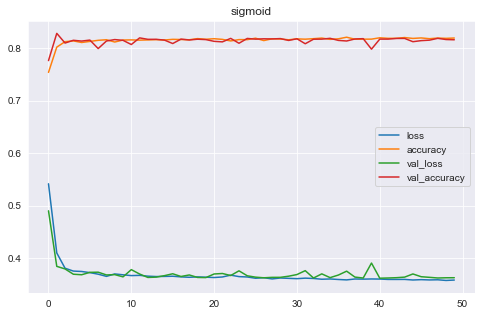

471/471 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8157


0.7543160690571049

In [129]:
act = activation_fun[0]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

tanh
Epoch 1/50
943/943 [==============================] - 3s 3ms/step - loss: 0.4169 - accuracy: 0.7932 - val_loss: 0.3753 - val_accuracy: 0.8107
Epoch 2/50
943/943 [==============================] - 2s 3ms/step - loss: 0.3828 - accuracy: 0.8058 - val_loss: 0.3705 - val_accuracy: 0.8107
Epoch 3/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3762 - accuracy: 0.8097 - val_loss: 0.3920 - val_accuracy: 0.8012
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3729 - accuracy: 0.8106 - val_loss: 0.3649 - val_accuracy: 0.8155
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3724 - accuracy: 0.8112 - val_loss: 0.3655 - val_accuracy: 0.8181
Epoch 6/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3700 - accuracy: 0.8133 - val_loss: 0.3684 - val_accuracy: 0.8168
Epoch 7/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3705 - accuracy: 0.8137 - val_loss: 0.3699 - val_accuracy: 0.8169
E

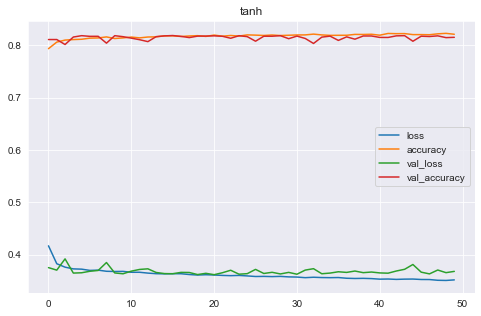

471/471 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8149


0.7543160690571049

In [130]:
act = activation_fun[1]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

relu
Epoch 1/50
943/943 [==============================] - 3s 2ms/step - loss: 1.2857 - accuracy: 0.7979 - val_loss: 0.8665 - val_accuracy: 0.8129
Epoch 2/50
943/943 [==============================] - 2s 2ms/step - loss: 0.6789 - accuracy: 0.7872 - val_loss: 0.3943 - val_accuracy: 0.7906
Epoch 3/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.7860 - val_loss: 0.3841 - val_accuracy: 0.7905
Epoch 4/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3808 - accuracy: 0.8082 - val_loss: 0.3721 - val_accuracy: 0.8120
Epoch 5/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8067 - val_loss: 0.3922 - val_accuracy: 0.7917
Epoch 6/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8113 - val_loss: 0.3735 - val_accuracy: 0.8089
Epoch 7/50
943/943 [==============================] - 2s 3ms/step - loss: 0.3788 - accuracy: 0.8109 - val_loss: 0.4041 - val_accuracy: 0.7850
E

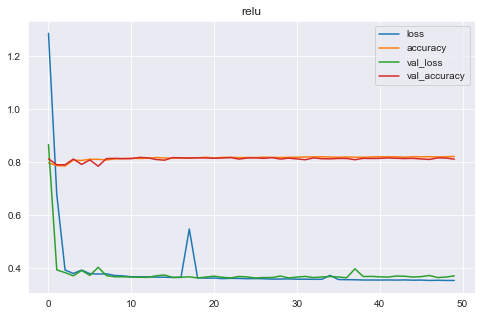

471/471 [==============================] - 1s 1ms/step - loss: 0.3718 - accuracy: 0.8116


0.7543160690571049

In [131]:
act = activation_fun[2]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

elu
Epoch 1/50
943/943 [==============================] - 3s 3ms/step - loss: 1.8744 - accuracy: 0.8011 - val_loss: 0.7623 - val_accuracy: 0.8280
Epoch 2/50
943/943 [==============================] - 2s 2ms/step - loss: 1.2828 - accuracy: 0.8192 - val_loss: 0.7566 - val_accuracy: 0.8126
Epoch 3/50
943/943 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.8311 - val_loss: 0.3911 - val_accuracy: 0.8344
Epoch 4/50
943/943 [==============================] - 2s 2ms/step - loss: 0.6146 - accuracy: 0.8319 - val_loss: 1.7199 - val_accuracy: 0.8139
Epoch 5/50
943/943 [==============================] - 2s 2ms/step - loss: 0.4244 - accuracy: 0.8366 - val_loss: 0.3848 - val_accuracy: 0.8211
Epoch 6/50
943/943 [==============================] - 2s 2ms/step - loss: 0.4258 - accuracy: 0.8345 - val_loss: 0.8071 - val_accuracy: 0.8272
Epoch 7/50
943/943 [==============================] - 2s 2ms/step - loss: 0.3622 - accuracy: 0.8386 - val_loss: 0.3409 - val_accuracy: 0.8370
Ep

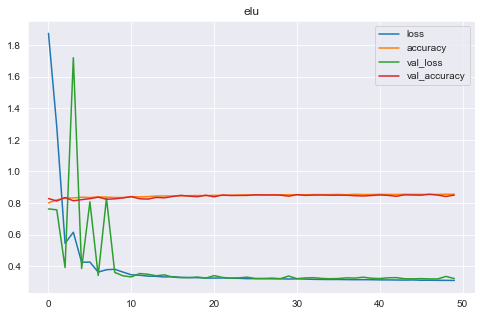

471/471 [==============================] - 1s 1ms/step - loss: 0.3211 - accuracy: 0.8502


0.7543160690571049

In [132]:
act = activation_fun[3]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

LeakyReLU
Epoch 1/50
943/943 [==============================] - 3s 3ms/step - loss: 2.2287 - accuracy: 0.8002 - val_loss: 0.4954 - val_accuracy: 0.8161
Epoch 2/50
943/943 [==============================] - 2s 2ms/step - loss: 0.6949 - accuracy: 0.8201 - val_loss: 0.4384 - val_accuracy: 0.8292
Epoch 3/50
943/943 [==============================] - 3s 3ms/step - loss: 0.6713 - accuracy: 0.8223 - val_loss: 0.6514 - val_accuracy: 0.8249
Epoch 4/50
943/943 [==============================] - 3s 3ms/step - loss: 0.6046 - accuracy: 0.8251 - val_loss: 0.3600 - val_accuracy: 0.8389
Epoch 5/50
943/943 [==============================] - 3s 3ms/step - loss: 0.4434 - accuracy: 0.8298 - val_loss: 0.3594 - val_accuracy: 0.8362
Epoch 6/50
943/943 [==============================] - 3s 3ms/step - loss: 0.4717 - accuracy: 0.8258 - val_loss: 0.3543 - val_accuracy: 0.8323
Epoch 7/50
943/943 [==============================] - 3s 3ms/step - loss: 0.3798 - accuracy: 0.8313 - val_loss: 0.3502 - val_accuracy: 0.8

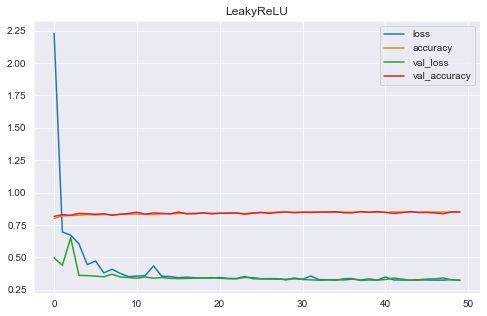

471/471 [==============================] - 1s 1ms/step - loss: 0.3236 - accuracy: 0.8488


0.7543160690571049

In [133]:
act = activation_fun[4]
model = Sequential()
model.add(Dense(100,activation=act,input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation=act))
model.add(Dense(10,activation=act))
model.add(Dense(1,activation='sigmoid'))
print(act)
print("========")
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=50)
results.append(pd.DataFrame(history.history))
pd.DataFrame(history.history).plot(figsize=(8, 5),title=act)
plt.show()
model.evaluate(X_test,y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=1))

# Zad. 
Stwórz wykres porównujący metody.

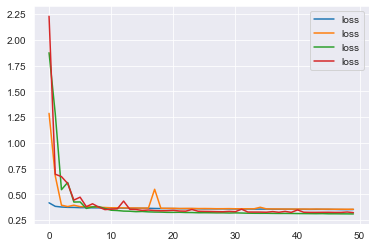

In [136]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[0]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[0]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[0]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[0]]].plot(label=activation_fun[3],ax=ax)
plt.show()

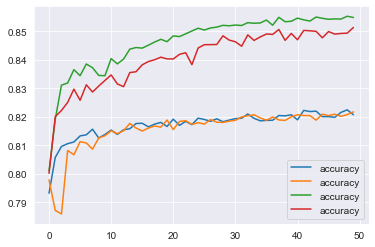

In [137]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[1]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[1]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[1]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[1]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[1]]].plot(label=activation_fun[4],ax=ax)
plt.show()

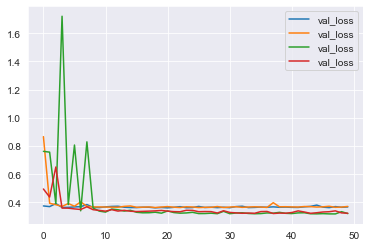

In [138]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[2]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[2]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[2]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[2]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[2]]].plot(label=activation_fun[4],ax=ax)
plt.show()

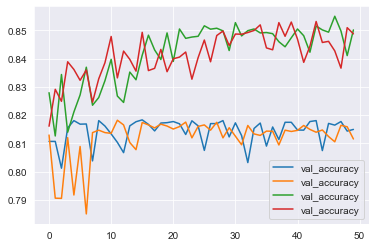

In [139]:
fig, ax = plt.subplots(1,1)
activation_fun = ["sigmoid",'tanh','relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[3]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[3]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[3]]].plot(label=activation_fun[2],ax=ax)
results[3].loc[:,[keys[3]]].plot(label=activation_fun[3],ax=ax)
# results[4].loc[:,[keys[3]]].plot(label=activation_fun[4],ax=ax)
plt.show()